In [1]:
import numpy as np
import statsmodels.api as sm
from regain.hmm.hmm_graphical_lasso import HMM_GraphicalLasso
from regain.hmm.utils import cross_validation,results_recap
from regain.datasets.hmm import generate_hmm
import randomcolor
import matplotlib.pyplot as plt
from regain.hmm.utils_pred import pred_HMM_GMM,pred_from_N_past_days,returns_recap,corr_pred_plot

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
N_samples = 1000
N_states = 5
N_TS = 10
sigma_Normal = 1
N_pred = 10
dataset = generate_hmm(n_samples= N_samples,
                       n_states=N_states,
                       n_dim_obs=N_TS,
                       mode_precisions='regain_random',
                       mode_mean = 'Normal',
                       transition_type='fixed',
                       sigma=sigma_Normal)


In [14]:
cov_real = {}

for i,k in enumerate(dataset['states'][-N_pred:]):
    cov_real[str(i)] = dataset['covariances'][k]
    

[1006.25981597 1005.51505029 1008.91777287 1002.51878349 1006.58718511
 1008.41155895 1003.5781003  1005.78274032 1002.58621945 1001.95140758]


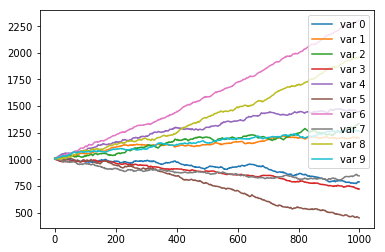

In [17]:
p_vec_0 = np.random.uniform(0,10,N_TS)+1000
Data = np.zeros((np.size(dataset['data'],axis=0),N_TS))
print(p_vec_0)
for j in range(N_TS):
    #print(p_vec_0[j])
    #print(np.cumsum(dataset['data'][:,j]))
    plt.plot(p_vec_0[j]+np.cumsum(dataset['data'][:,j]),label = 'var '+str(j))
    Data[:,j] = p_vec_0[j]+np.cumsum(dataset['data'][:,j])

plt.legend()
plt.show()

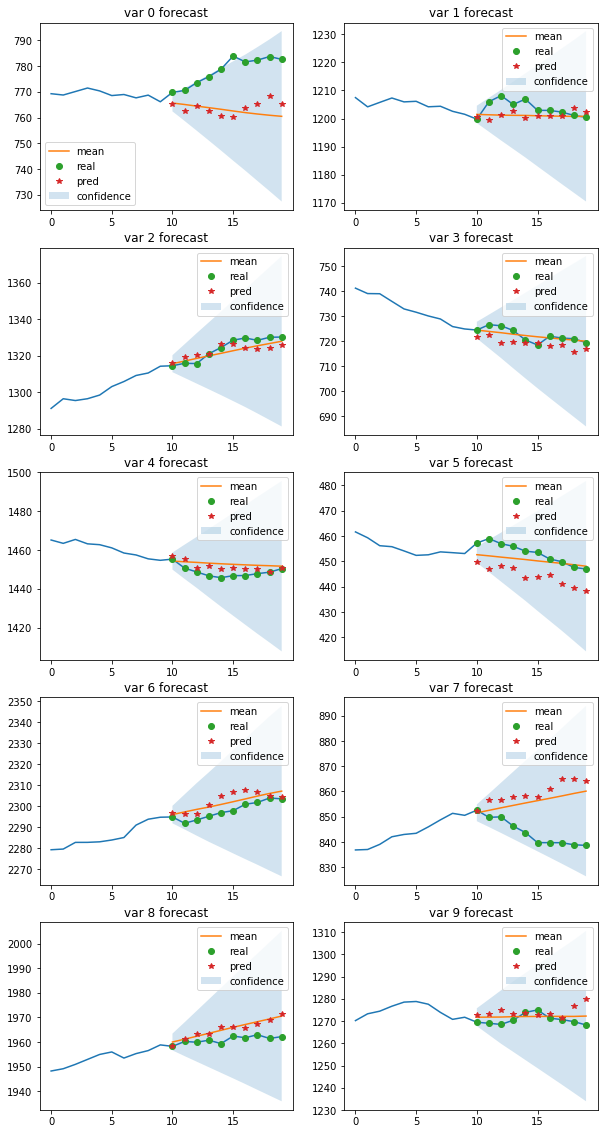

In [4]:
res = pred_from_N_past_days(dataset['data'],Data,N_past_days=50,N_test=N_pred,pred_meth = 'norolling')

In [20]:
print(returns_recap(res[-1], res[-2]).to_string())

       day    TS      mean       std  Prob positive return %  Prob negative return %
0    day 1  ts 0 -0.497647  1.623764               37.827072               61.902948
1    day 1  ts 1 -0.046671  1.546375               48.661157               51.068864
2    day 1  ts 2  1.385963  2.322794               72.328927               27.401094
3    day 1  ts 3 -0.454417  1.661207               39.086685               60.643335
4    day 1  ts 4 -0.393626  2.190740               42.735314               56.994706
5    day 1  ts 5 -0.450173  1.593818               38.744963               60.985057
6    day 1  ts 6  1.263555  2.082420               72.664913               27.065107
7    day 1  ts 7  0.995253  1.658032               72.448418               27.281603
8    day 1  ts 8  1.181968  1.712212               75.365242               24.364778
9    day 1  ts 9  0.020498  2.000501               50.273781               49.456239
10   day 2  ts 0 -0.564419  1.571882               35.842066     

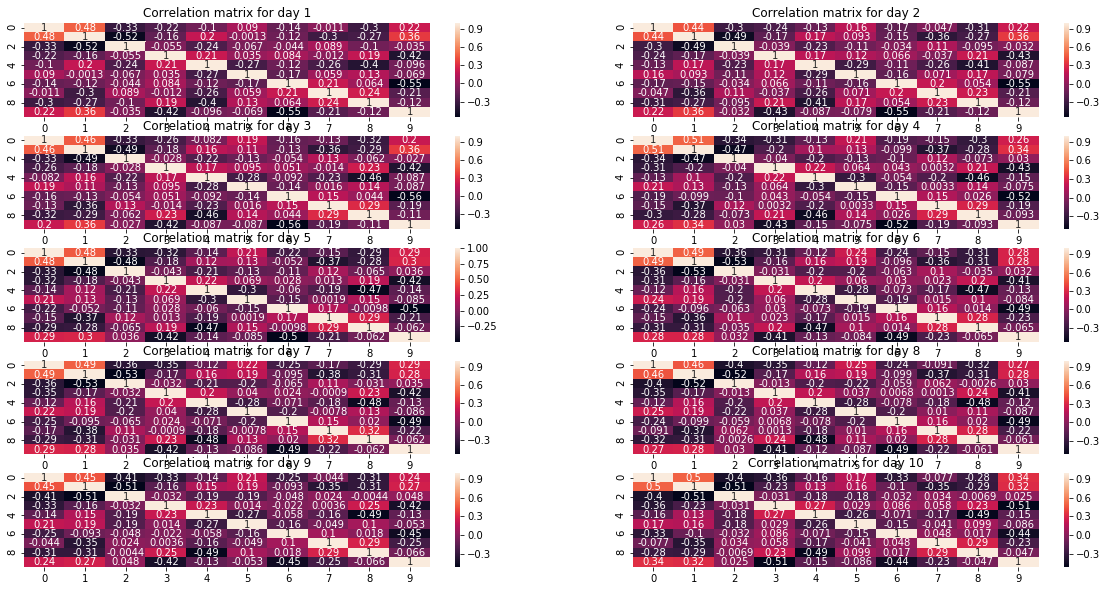

In [7]:
corr_pred_plot(res[-2],covcorr=True)

100%|██████████| 1/1 [04:30<00:00, 270.39s/it]


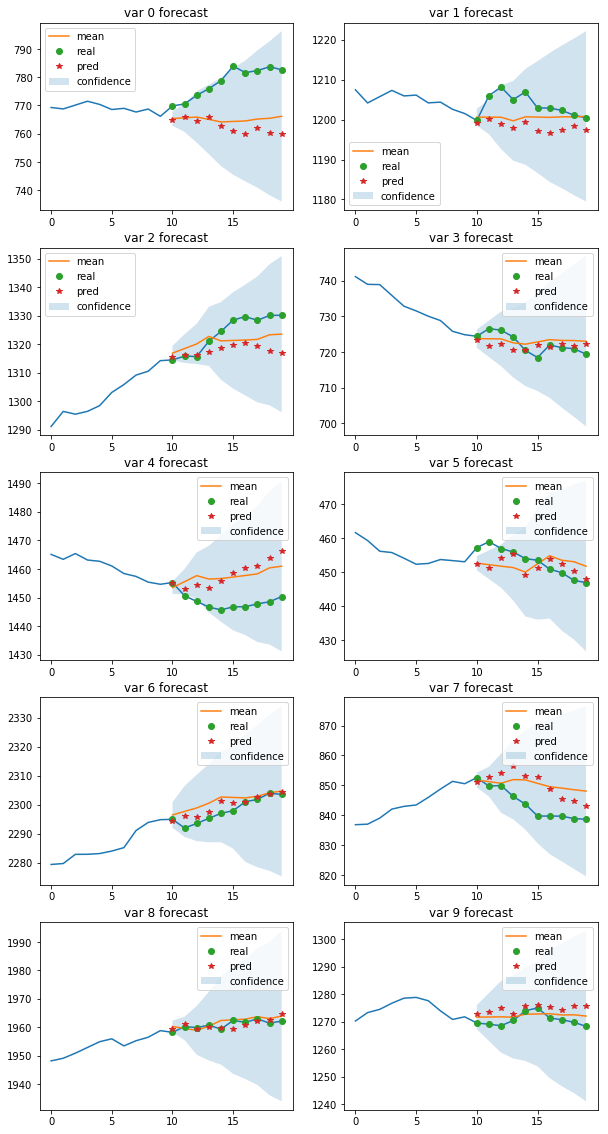

In [8]:
returns = pred_HMM_GMM(dataset['data'],
                       Data,
                       [30],
                       [N_states],
                       N_test = N_pred,
                       meth = 'viterbi',
                       pred_meth = 'norolling',
                       recrossval = False)

In [19]:
print(returns_recap(returns[-1], returns[-2]).to_string())

       day    TS      mean       std  Prob positive return %  Prob negative return %
0    day 1  ts 0 -0.806773  1.255329               25.886643               73.843377
1    day 1  ts 1 -0.902416  1.067553               19.761821               79.968200
2    day 1  ts 2  2.636504  1.266422               97.997210                1.732810
3    day 1  ts 3 -1.092794  1.283053               19.583660               80.146360
4    day 1  ts 4 -1.185984  1.111594               14.165352               85.564668
5    day 1  ts 5 -0.416399  1.049078               34.436354               65.293666
6    day 1  ts 6  1.634770  2.201422               76.978735               22.751286
7    day 1  ts 7  1.223029  1.238095               83.703262               16.026758
8    day 1  ts 8  1.448767  1.033146               91.823523                7.906497
9    day 1  ts 9 -0.114925  2.192586               47.774902               51.955118
10   day 2  ts 0  0.268924  2.020299               55.159722     

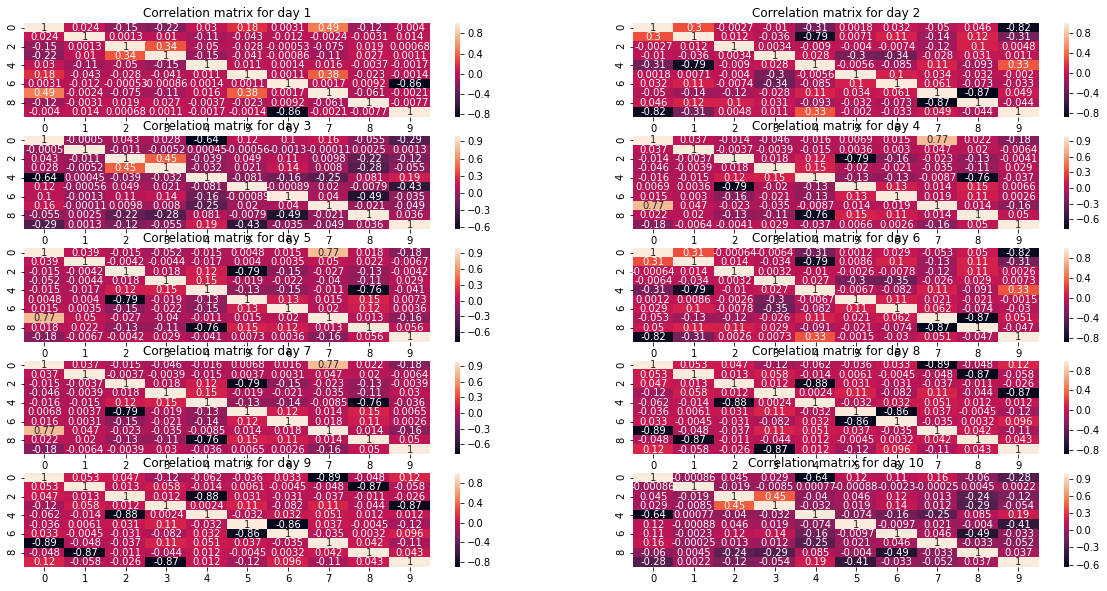

In [10]:
corr_pred_plot(returns[-2],covcorr=True)

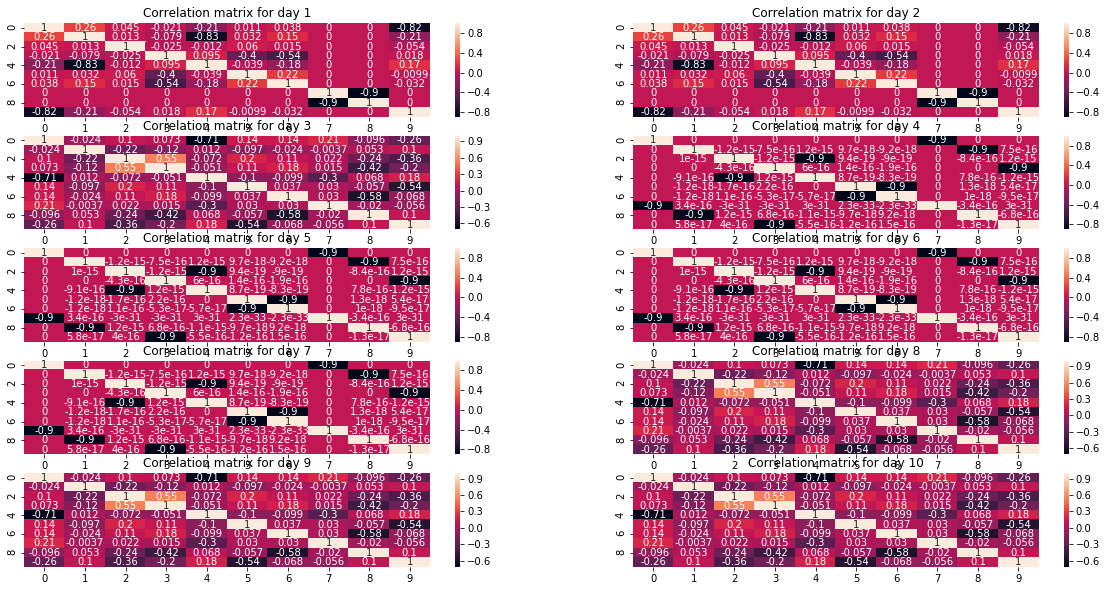

In [16]:
corr_pred_plot(cov_real,covcorr=True)